# Exploratory Data Analysis (EDA)
## Credit Risk Probability Model for Alternative Data

**Objective**: Explore the dataset to uncover patterns, identify data quality issues, and form hypotheses that will guide feature engineering.

**Dataset**: Xente eCommerce Transaction Data


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Create figures directory if it doesn't exist
figures_dir = 'figures'
os.makedirs(figures_dir, exist_ok=True)
print(f"Figures will be saved to: {figures_dir}/")


Figures will be saved to: figures/


## 1. Overview of the Data

Understanding the structure of the dataset, including the number of rows, columns, and data types.


In [3]:
# Load the data
df = pd.read_csv('../data/raw/data.csv')

# Basic information about the dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nDataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumn Names:")
print(df.columns.tolist())
print(f"\nData Types:")
print(df.dtypes)
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATASET OVERVIEW

Dataset Shape: 95,662 rows × 16 columns

Column Names:
['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Memory Usage: 66.48 MB


In [4]:
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
# Display last few rows
print("Last 5 rows:")
df.tail()


Last 5 rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0


## 2. Summary Statistics

Understanding the central tendency, dispersion, and shape of the dataset's distribution.

In [6]:
# Summary statistics for numerical features
print("=" * 60)
print("NUMERICAL FEATURES SUMMARY STATISTICS")
print("=" * 60)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns: {numerical_cols}")
df[numerical_cols].describe()


NUMERICAL FEATURES SUMMARY STATISTICS

Numerical columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [8]:
# Summary statistics for categorical features
print("=" * 60)
print("CATEGORICAL FEATURES SUMMARY")
print("=" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns: {categorical_cols}")
print(f"\nNumber of unique values per categorical column:")
for col in categorical_cols:
    print(f"  {col}: {df[col].nunique()} unique values")


CATEGORICAL FEATURES SUMMARY

Categorical columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']

Number of unique values per categorical column:
  TransactionId: 95662 unique values
  BatchId: 94809 unique values
  AccountId: 3633 unique values
  SubscriptionId: 3627 unique values
  CustomerId: 3742 unique values
  CurrencyCode: 1 unique values
  ProviderId: 6 unique values
  ProductId: 23 unique values
  ProductCategory: 9 unique values
  ChannelId: 4 unique values
  TransactionStartTime: 94556 unique values


## 3. Distribution of Numerical Features

Visualizing the distribution of numerical features to identify patterns, skewness, and potential outliers.

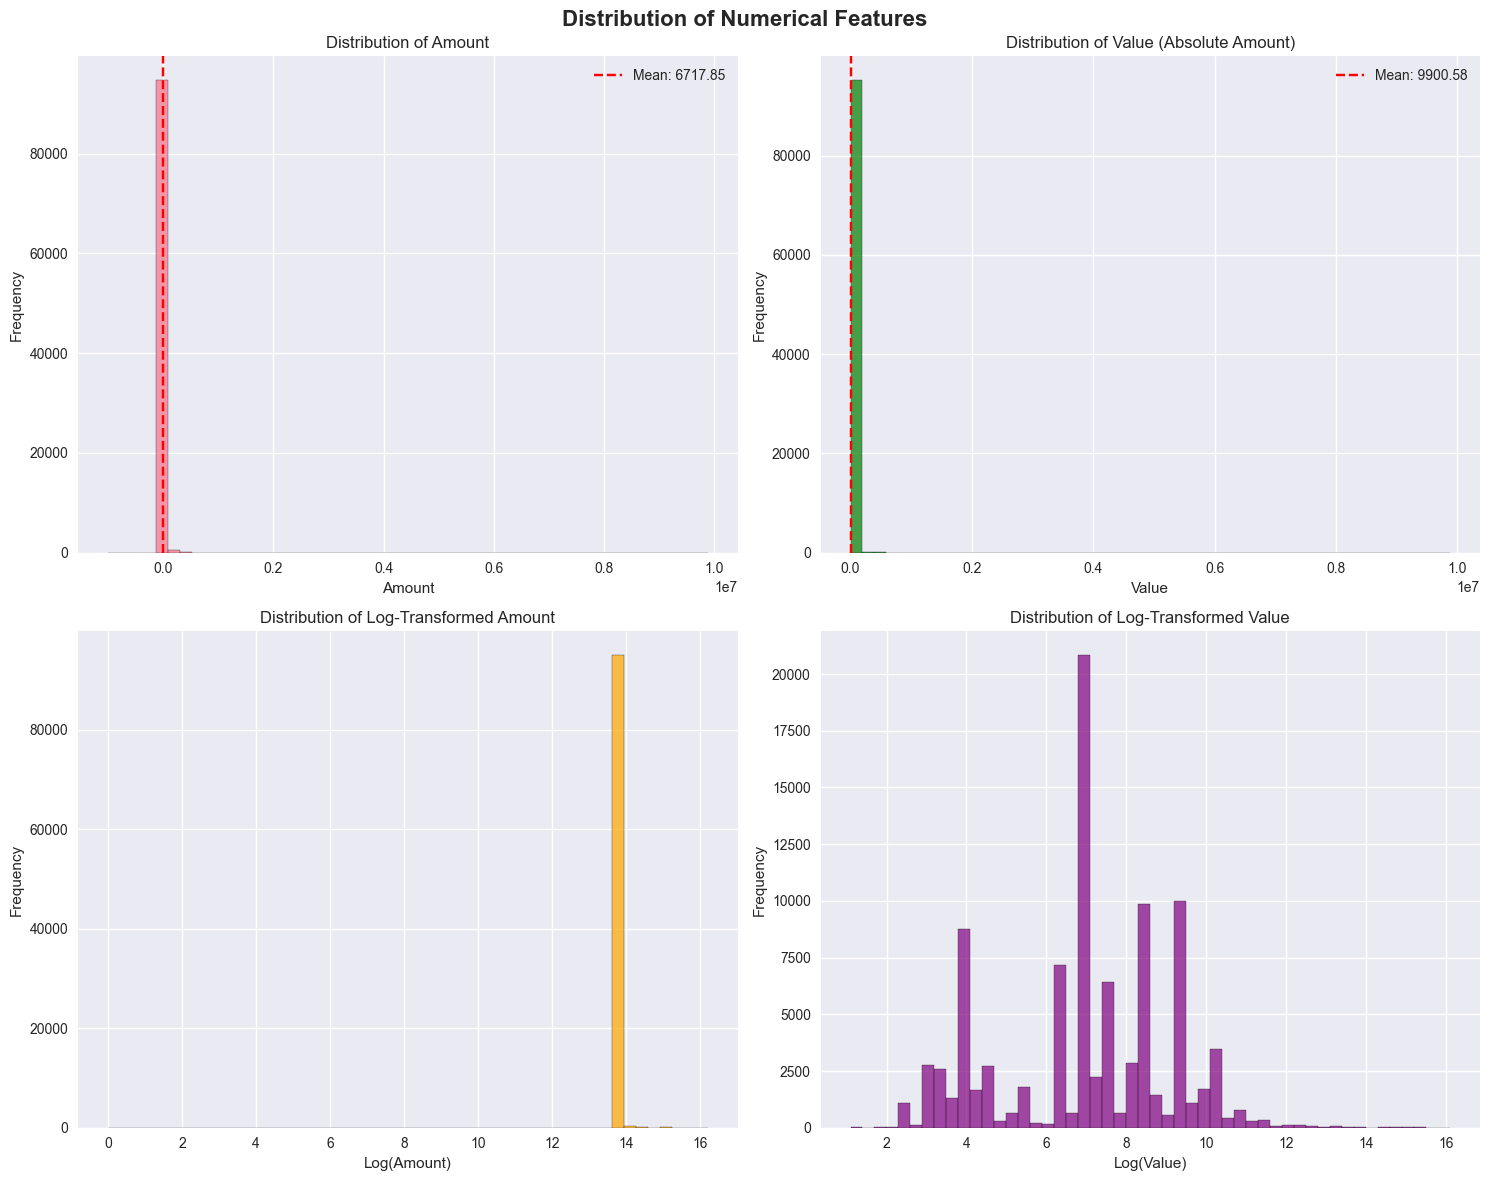

Figure saved to: figures/01_numerical_features_distribution.png


In [11]:
# Distribution plots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

# Amount distribution
axes[0, 0].hist(df['Amount'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Amount')
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Amount'].mean(), color='red', linestyle='--', label=f'Mean: {df["Amount"].mean():.2f}')
axes[0, 0].legend()

# Value distribution
axes[0, 1].hist(df['Value'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Distribution of Value (Absolute Amount)')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['Value'].mean(), color='red', linestyle='--', label=f'Mean: {df["Value"].mean():.2f}')
axes[0, 1].legend()

# Log transformation of Amount (to handle skewness)
if (df['Amount'] > 0).any():
    log_amount = np.log1p(df['Amount'] - df['Amount'].min())
    axes[1, 0].hist(log_amount, bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[1, 0].set_title('Distribution of Log-Transformed Amount')
    axes[1, 0].set_xlabel('Log(Amount)')
    axes[1, 0].set_ylabel('Frequency')

# Log transformation of Value
log_value = np.log1p(df['Value'])
axes[1, 1].hist(log_value, bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_title('Distribution of Log-Transformed Value')
axes[1, 1].set_xlabel('Log(Value)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig(f'{figures_dir}/01_numerical_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Figure saved to: {figures_dir}/01_numerical_features_distribution.png")


In [12]:
# Check for skewness
print("=" * 60)
print("SKEWNESS ANALYSIS")
print("=" * 60)
for col in numerical_cols:
    skewness = df[col].skew()
    print(f"{col}: {skewness:.4f} ({'Highly skewed' if abs(skewness) > 1 else 'Moderately skewed' if abs(skewness) > 0.5 else 'Approximately symmetric'})")


SKEWNESS ANALYSIS
CountryCode: 0.0000 (Approximately symmetric)
Amount: 51.0985 (Highly skewed)
Value: 51.2911 (Highly skewed)
PricingStrategy: 1.6591 (Highly skewed)
FraudResult: 22.1963 (Highly skewed)


## 4. Distribution of Categorical Features

Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.


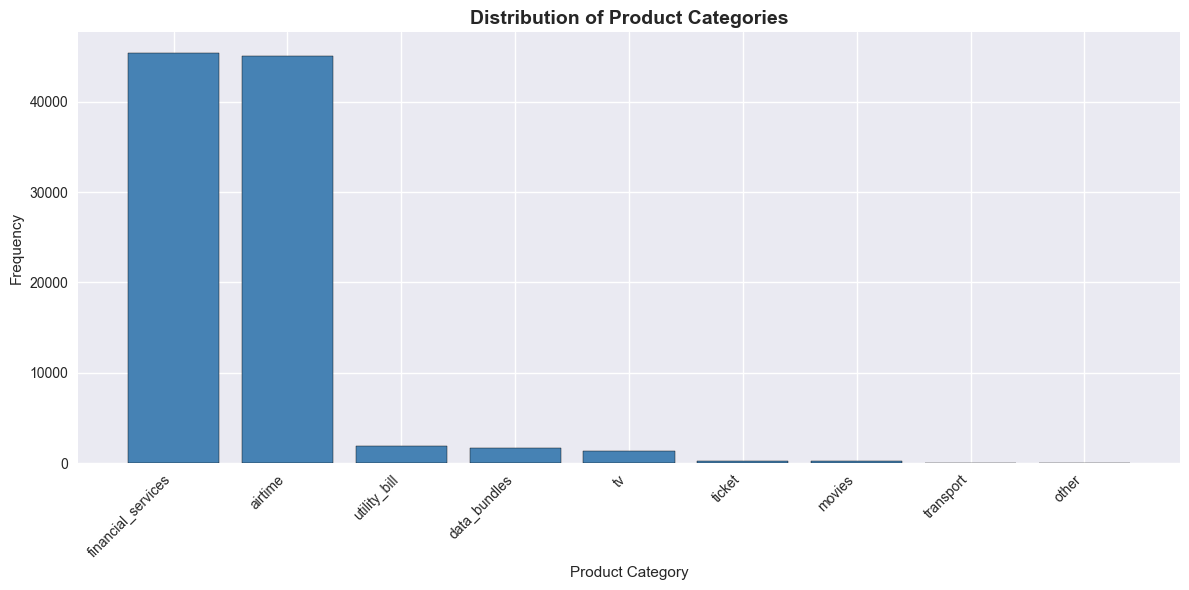

Figure saved to: figures/02_product_category_distribution.png

Product Category Distribution:
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64

Percentage distribution:
ProductCategory
financial_services    47.46
airtime               47.07
utility_bill           2.01
data_bundles           1.69
tv                     1.34
ticket                 0.23
movies                 0.18
transport              0.03
other                  0.00
Name: count, dtype: float64


In [13]:
# Distribution of ProductCategory
plt.figure(figsize=(12, 6))
product_counts = df['ProductCategory'].value_counts()
plt.bar(product_counts.index, product_counts.values, color='steelblue', edgecolor='black')
plt.title('Distribution of Product Categories', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'{figures_dir}/02_product_category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Figure saved to: {figures_dir}/02_product_category_distribution.png")

print(f"\nProduct Category Distribution:")
print(product_counts)
print(f"\nPercentage distribution:")
print((product_counts / len(df) * 100).round(2))


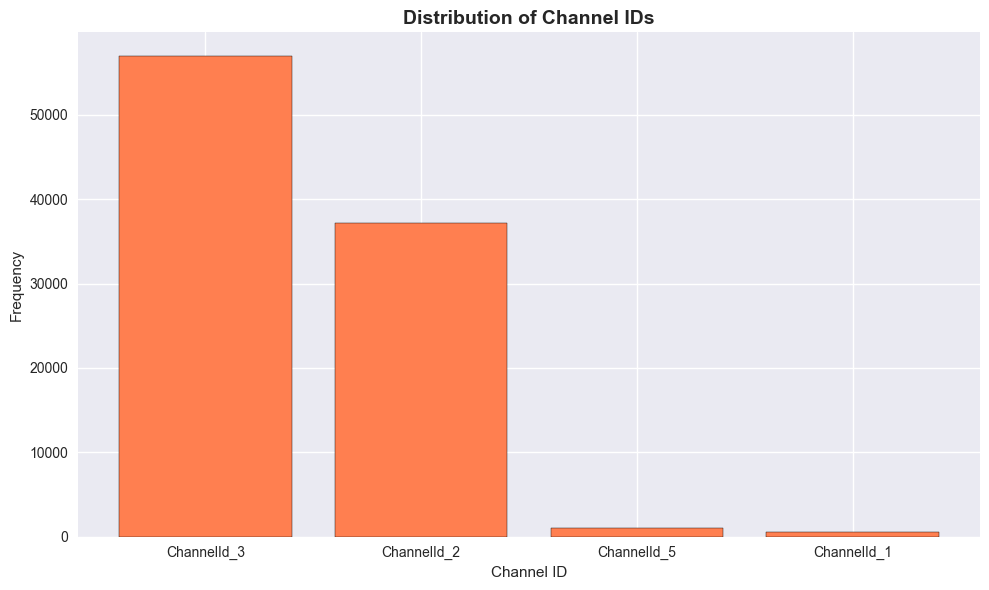

Figure saved to: figures/03_channel_id_distribution.png

Channel ID Distribution:
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


In [15]:
# Distribution of ChannelId
plt.figure(figsize=(10, 6))
channel_counts = df['ChannelId'].value_counts()
plt.bar(channel_counts.index, channel_counts.values, color='coral', edgecolor='black')
plt.title('Distribution of Channel IDs', fontsize=14, fontweight='bold')
plt.xlabel('Channel ID')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'{figures_dir}/03_channel_id_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Figure saved to: {figures_dir}/03_channel_id_distribution.png")

print(f"\nChannel ID Distribution:")
print(channel_counts)


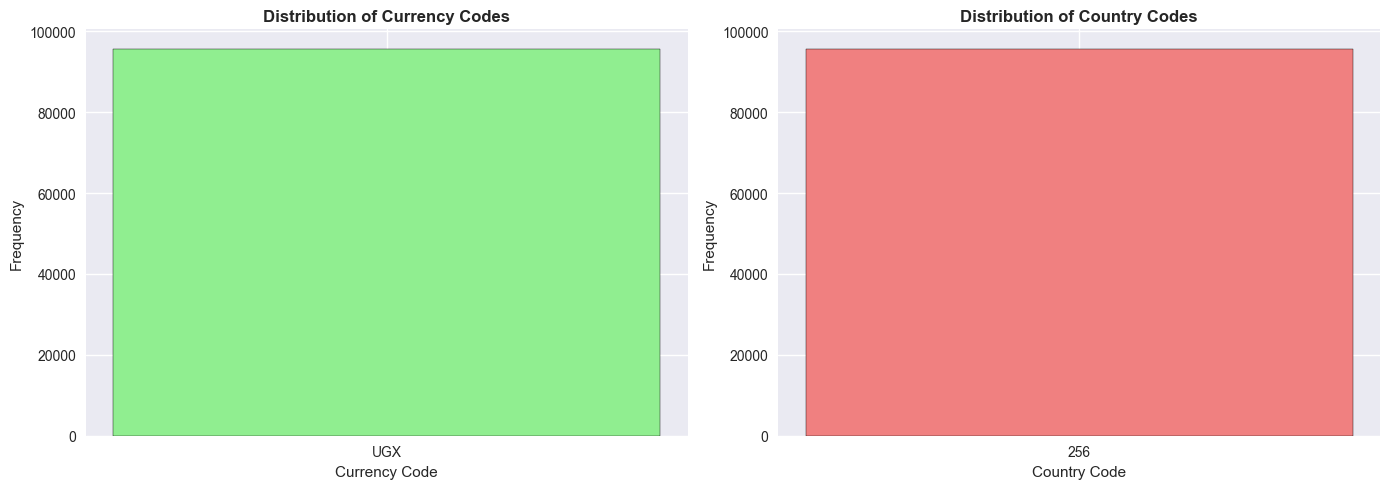

Figure saved to: figures/04_currency_country_distribution.png


In [16]:
# Distribution of CurrencyCode and CountryCode
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CurrencyCode
currency_counts = df['CurrencyCode'].value_counts()
axes[0].bar(currency_counts.index, currency_counts.values, color='lightgreen', edgecolor='black')
axes[0].set_title('Distribution of Currency Codes', fontweight='bold')
axes[0].set_xlabel('Currency Code')
axes[0].set_ylabel('Frequency')

# CountryCode
country_counts = df['CountryCode'].value_counts()
axes[1].bar(country_counts.index.astype(str), country_counts.values, color='lightcoral', edgecolor='black')
axes[1].set_title('Distribution of Country Codes', fontweight='bold')
axes[1].set_xlabel('Country Code')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig(f'{figures_dir}/04_currency_country_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Figure saved to: {figures_dir}/04_currency_country_distribution.png")


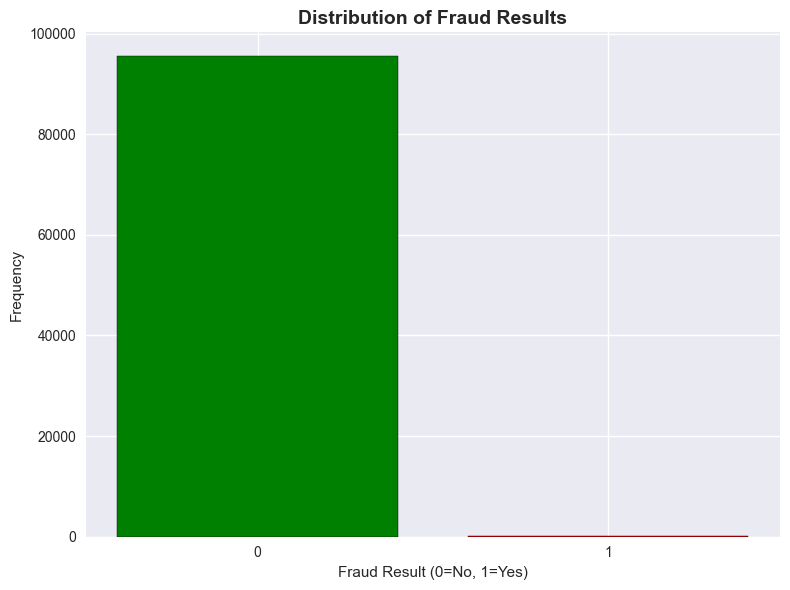

Figure saved to: figures/05_fraud_result_distribution.png

Fraud Result Distribution:
FraudResult
0    95469
1      193
Name: count, dtype: int64

Percentage:
FraudResult
0    99.8
1     0.2
Name: count, dtype: float64


In [17]:
# Distribution of FraudResult
plt.figure(figsize=(8, 6))
fraud_counts = df['FraudResult'].value_counts()
plt.bar(fraud_counts.index.astype(str), fraud_counts.values, color=['green', 'red'], edgecolor='black')
plt.title('Distribution of Fraud Results', fontsize=14, fontweight='bold')
plt.xlabel('Fraud Result (0=No, 1=Yes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'{figures_dir}/05_fraud_result_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Figure saved to: {figures_dir}/05_fraud_result_distribution.png")

print(f"\nFraud Result Distribution:")
print(fraud_counts)
print(f"\nPercentage:")
print((fraud_counts / len(df) * 100).round(2))


## 5. Correlation Analysis

Understanding the relationship between numerical features.


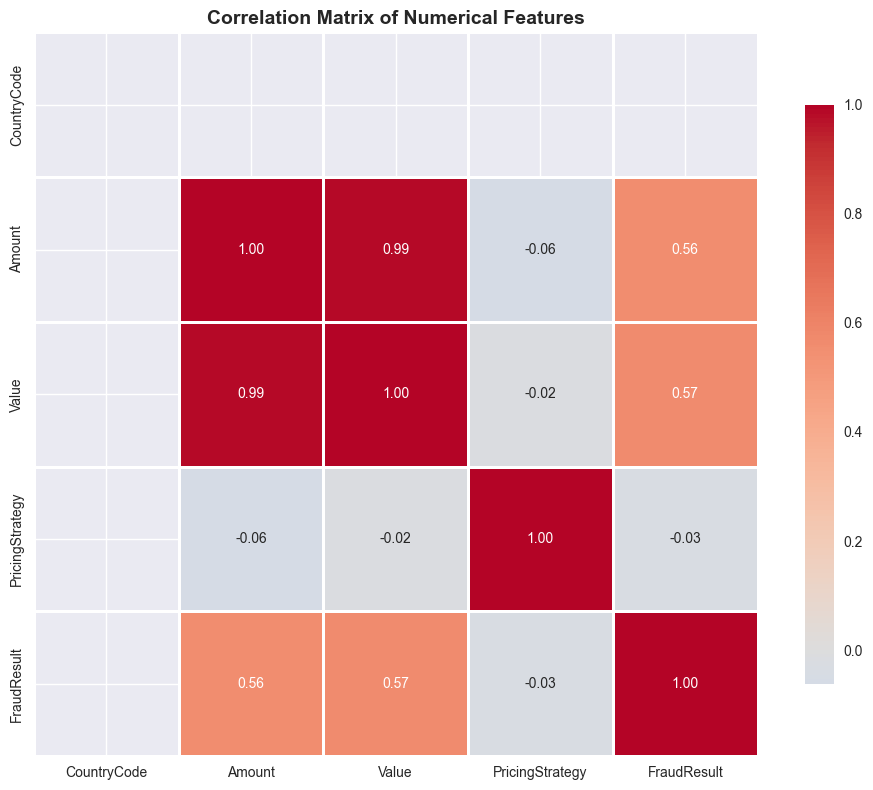

Figure saved to: figures/06_correlation_matrix.png

Correlation Matrix:
                 CountryCode    Amount     Value  PricingStrategy  FraudResult
CountryCode              NaN       NaN       NaN              NaN          NaN
Amount                   NaN  1.000000  0.989692        -0.061931     0.557370
Value                    NaN  0.989692  1.000000        -0.017020     0.566739
PricingStrategy          NaN -0.061931 -0.017020         1.000000    -0.033821
FraudResult              NaN  0.557370  0.566739        -0.033821     1.000000


In [18]:
# Correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{figures_dir}/06_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Figure saved to: {figures_dir}/06_correlation_matrix.png")

print("\nCorrelation Matrix:")
print(correlation_matrix)


In [19]:
# Identify highly correlated features (threshold > 0.7 or < -0.7)
print("=" * 60)
print("HIGHLY CORRELATED FEATURES (|correlation| > 0.7)")
print("=" * 60)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))

if high_corr_pairs:
    for col1, col2, corr in high_corr_pairs:
        print(f"{col1} <-> {col2}: {corr:.4f}")
else:
    print("No highly correlated pairs found (threshold: |0.7|)")


HIGHLY CORRELATED FEATURES (|correlation| > 0.7)
Amount <-> Value: 0.9897


## 6. Identifying Missing Values

Identify missing values to determine missing data and decide on appropriate imputation strategies.


In [20]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df.to_string(index=False))
else:
    print("\n✓ No missing values found in the dataset!")

# Visualize missing values if any
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    plt.bar(missing_df['Column'], missing_df['Missing Percentage'], color='red', edgecolor='black')
    plt.title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
    plt.xlabel('Column')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{figures_dir}/07_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Figure saved to: {figures_dir}/07_missing_values.png")


MISSING VALUES ANALYSIS

✓ No missing values found in the dataset!


## 7. Outlier Detection

Use box plots to identify outliers.


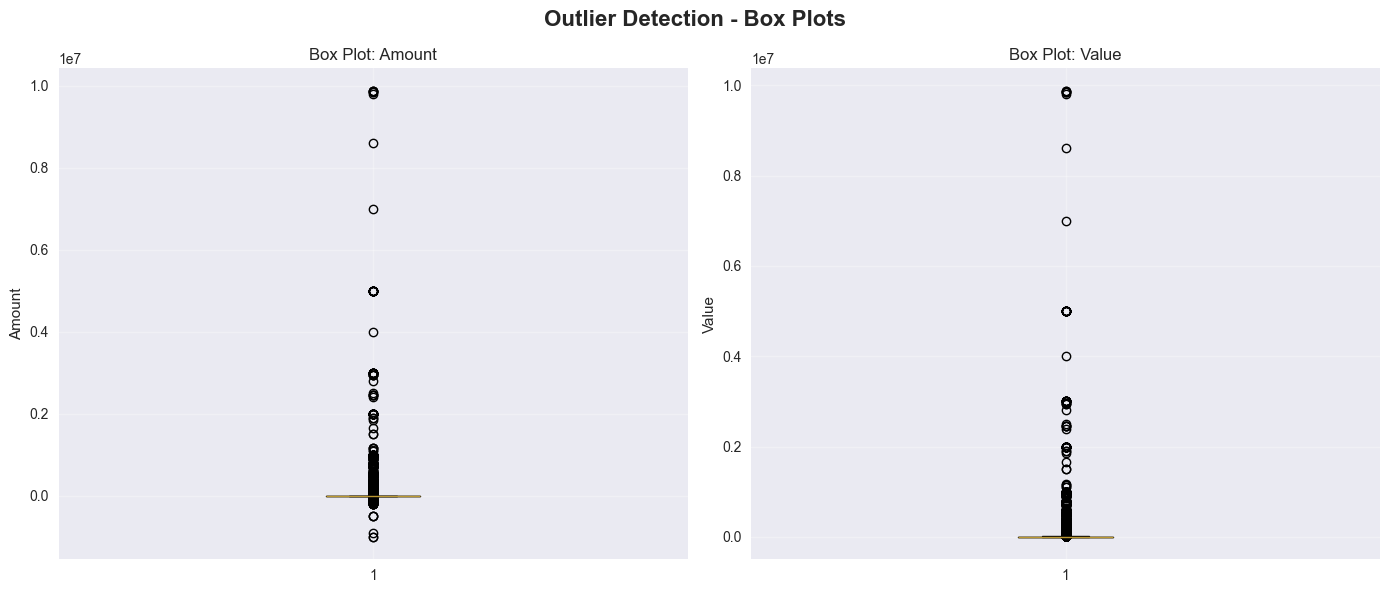

Figure saved to: figures/08_outlier_detection_boxplots.png


In [21]:
# Box plots for numerical features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Outlier Detection - Box Plots', fontsize=16, fontweight='bold')

# Amount box plot
axes[0].boxplot(df['Amount'], vert=True)
axes[0].set_title('Box Plot: Amount')
axes[0].set_ylabel('Amount')
axes[0].grid(True, alpha=0.3)

# Value box plot
axes[1].boxplot(df['Value'], vert=True)
axes[1].set_title('Box Plot: Value')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{figures_dir}/08_outlier_detection_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Figure saved to: {figures_dir}/08_outlier_detection_boxplots.png")


In [22]:
# Calculate IQR and identify outliers
print("=" * 60)
print("OUTLIER DETECTION USING IQR METHOD")
print("=" * 60)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers):,} ({outlier_percentage:.2f}%)")
    if len(outliers) > 0:
        print(f"  Min outlier: {outliers[col].min():.2f}, Max outlier: {outliers[col].max():.2f}")


OUTLIER DETECTION USING IQR METHOD

CountryCode:
  Q1: 256.00, Q3: 256.00, IQR: 0.00
  Lower bound: 256.00, Upper bound: 256.00
  Number of outliers: 0 (0.00%)

Amount:
  Q1: -50.00, Q3: 2800.00, IQR: 2850.00
  Lower bound: -4325.00, Upper bound: 7075.00
  Number of outliers: 24,441 (25.55%)
  Min outlier: -1000000.00, Max outlier: 9880000.00

Value:
  Q1: 275.00, Q3: 5000.00, IQR: 4725.00
  Lower bound: -6812.50, Upper bound: 12087.50
  Number of outliers: 9,021 (9.43%)
  Min outlier: 12300.00, Max outlier: 9880000.00

PricingStrategy:
  Q1: 2.00, Q3: 2.00, IQR: 0.00
  Lower bound: 2.00, Upper bound: 2.00
  Number of outliers: 15,814 (16.53%)
  Min outlier: 0.00, Max outlier: 4.00

FraudResult:
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  Lower bound: 0.00, Upper bound: 0.00
  Number of outliers: 193 (0.20%)
  Min outlier: 1.00, Max outlier: 1.00


## 7.1 Outlier Handling

After detecting outliers, we need to decide how to handle them. This section explores different outlier treatment strategies.


In [27]:
# Outlier Handling Analysis
print("=" * 80)
print("OUTLIER HANDLING ANALYSIS")
print("=" * 80)

# Store original data for comparison
df_original = df.copy()

# Analyze outliers for Amount and Value
outlier_handling_summary = {}

for col in ['Amount', 'Value']:
    if col not in df.columns:
        continue
        
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    # Calculate percentiles for capping
    p1 = df[col].quantile(0.01)
    p99 = df[col].quantile(0.99)
    p5 = df[col].quantile(0.05)
    p95 = df[col].quantile(0.95)
    
    outlier_handling_summary[col] = {
        'outlier_count': outlier_count,
        'outlier_pct': outlier_pct,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'p1': p1,
        'p99': p99,
        'p5': p5,
        'p95': p95,
        'min': df[col].min(),
        'max': df[col].max()
    }
    
    print(f"\n{col} Outlier Summary:")
    print(f"  Total outliers: {outlier_count:,} ({outlier_pct:.2f}%)")
    print(f"  IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  1st percentile: {p1:.2f}, 99th percentile: {p99:.2f}")
    print(f"  5th percentile: {p5:.2f}, 95th percentile: {p95:.2f}")
    print(f"  Min value: {df[col].min():.2f}, Max value: {df[col].max():.2f}")


OUTLIER HANDLING ANALYSIS

Amount Outlier Summary:
  Total outliers: 24,441 (25.55%)
  IQR bounds: [-4325.00, 7075.00]
  1st percentile: -30000.00, 99th percentile: 80000.00
  5th percentile: -5000.00, 95th percentile: 14500.00
  Min value: -1000000.00, Max value: 9880000.00

Value Outlier Summary:
  Total outliers: 9,021 (9.43%)
  IQR bounds: [-6812.50, 12087.50]
  1st percentile: 10.00, 99th percentile: 90000.00
  5th percentile: 25.00, 95th percentile: 25000.00
  Min value: 2.00, Max value: 9880000.00


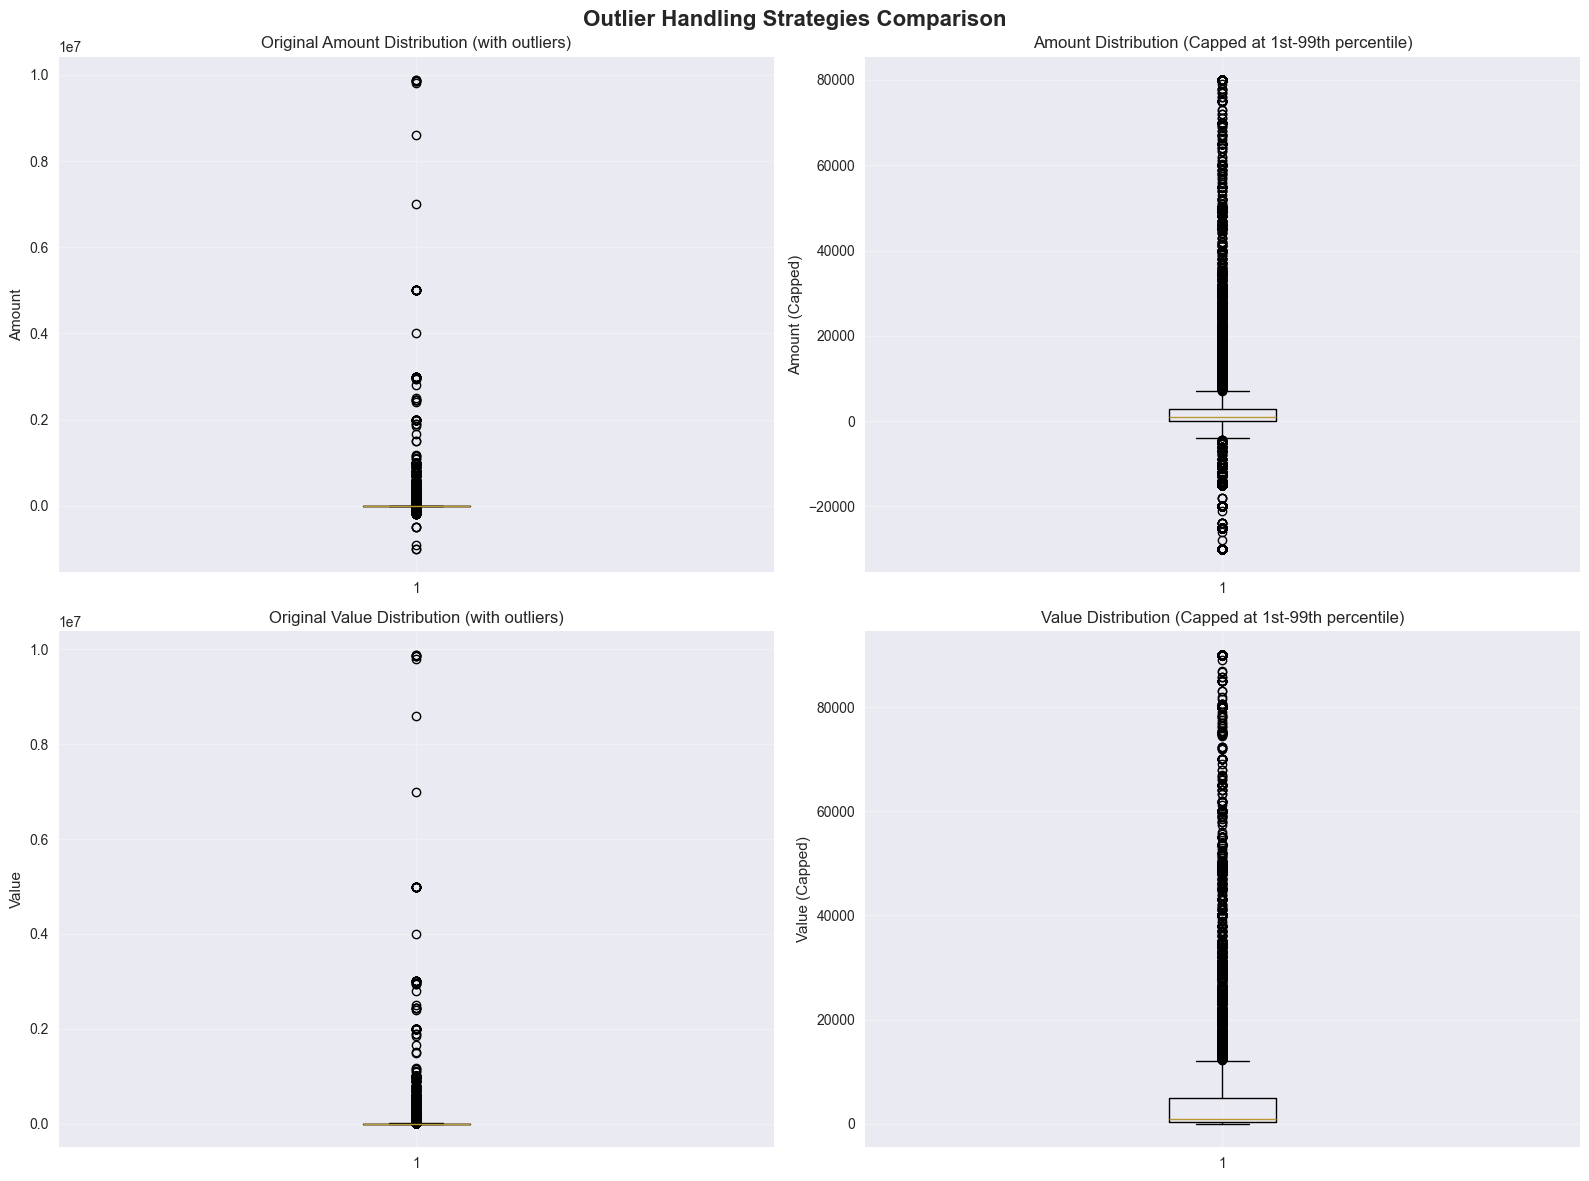

Figure saved to: figures/10_outlier_handling_comparison.png


In [28]:
# Visualize outliers before and after treatment
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Outlier Handling Strategies Comparison', fontsize=16, fontweight='bold')

# Original Amount distribution
axes[0, 0].boxplot(df['Amount'], vert=True)
axes[0, 0].set_title('Original Amount Distribution (with outliers)')
axes[0, 0].set_ylabel('Amount')
axes[0, 0].grid(True, alpha=0.3)

# Capped Amount (99th percentile)
amount_capped = df['Amount'].clip(
    lower=outlier_handling_summary['Amount']['p1'],
    upper=outlier_handling_summary['Amount']['p99']
)
axes[0, 1].boxplot(amount_capped, vert=True)
axes[0, 1].set_title('Amount Distribution (Capped at 1st-99th percentile)')
axes[0, 1].set_ylabel('Amount (Capped)')
axes[0, 1].grid(True, alpha=0.3)

# Original Value distribution
axes[1, 0].boxplot(df['Value'], vert=True)
axes[1, 0].set_title('Original Value Distribution (with outliers)')
axes[1, 0].set_ylabel('Value')
axes[1, 0].grid(True, alpha=0.3)

# Capped Value (99th percentile)
value_capped = df['Value'].clip(
    lower=outlier_handling_summary['Value']['p1'],
    upper=outlier_handling_summary['Value']['p99']
)
axes[1, 1].boxplot(value_capped, vert=True)
axes[1, 1].set_title('Value Distribution (Capped at 1st-99th percentile)')
axes[1, 1].set_ylabel('Value (Capped)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{figures_dir}/10_outlier_handling_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Figure saved to: {figures_dir}/10_outlier_handling_comparison.png")


In [29]:
# Outlier Handling Recommendations
print("=" * 80)
print("OUTLIER HANDLING RECOMMENDATIONS")
print("=" * 80)

for col in ['Amount', 'Value']:
    if col not in outlier_handling_summary:
        continue
        
    summary = outlier_handling_summary[col]
    
    print(f"\n{col}:")
    print(f"  Outlier percentage: {summary['outlier_pct']:.2f}%")
    
    if summary['outlier_pct'] > 10:
        print(f"  ⚠️  HIGH OUTLIER PERCENTAGE - Requires treatment")
        print(f"  Recommended approach:")
        print(f"    1. Capping at 1st-99th percentile: [{summary['p1']:.2f}, {summary['p99']:.2f}]")
        print(f"    2. Alternative: Capping at 5th-95th percentile: [{summary['p5']:.2f}, {summary['p95']:.2f}]")
        print(f"    3. Log transformation for highly skewed data")
        print(f"    4. Robust scaling (less sensitive to outliers)")
    elif summary['outlier_pct'] > 5:
        print(f"  ⚠️  MODERATE OUTLIER PERCENTAGE - Consider treatment")
        print(f"  Recommended approach:")
        print(f"    1. Capping at 99th percentile: {summary['p99']:.2f}")
        print(f"    2. Monitor impact on model performance")
    else:
        print(f"  ✓ LOW OUTLIER PERCENTAGE - May not require treatment")
        print(f"  Recommended approach:")
        print(f"    1. Keep outliers if they represent legitimate business cases")
        print(f"    2. Use robust scaling if needed")

# Create a cleaned dataset with capped outliers (for reference)
df_cleaned = df.copy()
for col in ['Amount', 'Value']:
    if col in outlier_handling_summary:
        summary = outlier_handling_summary[col]
        df_cleaned[f'{col}_capped'] = df[col].clip(
            lower=summary['p1'],
            upper=summary['p99']
        )
        print(f"\n✓ Created {col}_capped column with outliers capped at 1st-99th percentile")

print(f"\n{'='*80}")
print("NOTE: The cleaned dataset (df_cleaned) is available for reference.")
print("Decision on outlier handling should be made based on business context and model performance.")
print(f"{'='*80}")


OUTLIER HANDLING RECOMMENDATIONS

Amount:
  Outlier percentage: 25.55%
  ⚠️  HIGH OUTLIER PERCENTAGE - Requires treatment
  Recommended approach:
    1. Capping at 1st-99th percentile: [-30000.00, 80000.00]
    2. Alternative: Capping at 5th-95th percentile: [-5000.00, 14500.00]
    3. Log transformation for highly skewed data
    4. Robust scaling (less sensitive to outliers)

Value:
  Outlier percentage: 9.43%
  ⚠️  MODERATE OUTLIER PERCENTAGE - Consider treatment
  Recommended approach:
    1. Capping at 99th percentile: 90000.00
    2. Monitor impact on model performance

✓ Created Amount_capped column with outliers capped at 1st-99th percentile

✓ Created Value_capped column with outliers capped at 1st-99th percentile

NOTE: The cleaned dataset (df_cleaned) is available for reference.
Decision on outlier handling should be made based on business context and model performance.


In [30]:
# Compare statistics before and after capping
print("=" * 80)
print("STATISTICS COMPARISON: ORIGINAL vs CAPPED")
print("=" * 80)

comparison_stats = pd.DataFrame({
    'Original_Mean': [df['Amount'].mean(), df['Value'].mean()],
    'Capped_Mean': [df_cleaned['Amount_capped'].mean(), df_cleaned['Value_capped'].mean()],
    'Original_Std': [df['Amount'].std(), df['Value'].std()],
    'Capped_Std': [df_cleaned['Amount_capped'].std(), df_cleaned['Value_capped'].std()],
    'Original_Max': [df['Amount'].max(), df['Value'].max()],
    'Capped_Max': [df_cleaned['Amount_capped'].max(), df_cleaned['Value_capped'].max()],
}, index=['Amount', 'Value'])

print("\nComparison Statistics:")
print(comparison_stats.round(2))

print("\nImpact of Capping:")
for col in ['Amount', 'Value']:
    original_max = df[col].max()
    capped_max = df_cleaned[f'{col}_capped'].max()
    reduction = ((original_max - capped_max) / original_max) * 100
    print(f"  {col}: Max value reduced from {original_max:,.2f} to {capped_max:,.2f} ({reduction:.1f}% reduction)")


STATISTICS COMPARISON: ORIGINAL vs CAPPED

Comparison Statistics:
        Original_Mean  Capped_Mean  Original_Std  Capped_Std  Original_Max  \
Amount        6717.85      2537.70     123306.80    12161.97     9880000.0   
Value         9900.58      5576.63     123122.09    12324.08     9880000.0   

        Capped_Max  
Amount     80000.0  
Value      90000.0  

Impact of Capping:
  Amount: Max value reduced from 9,880,000.00 to 80,000.00 (99.2% reduction)
  Value: Max value reduced from 9,880,000.00 to 90,000.00 (99.1% reduction)


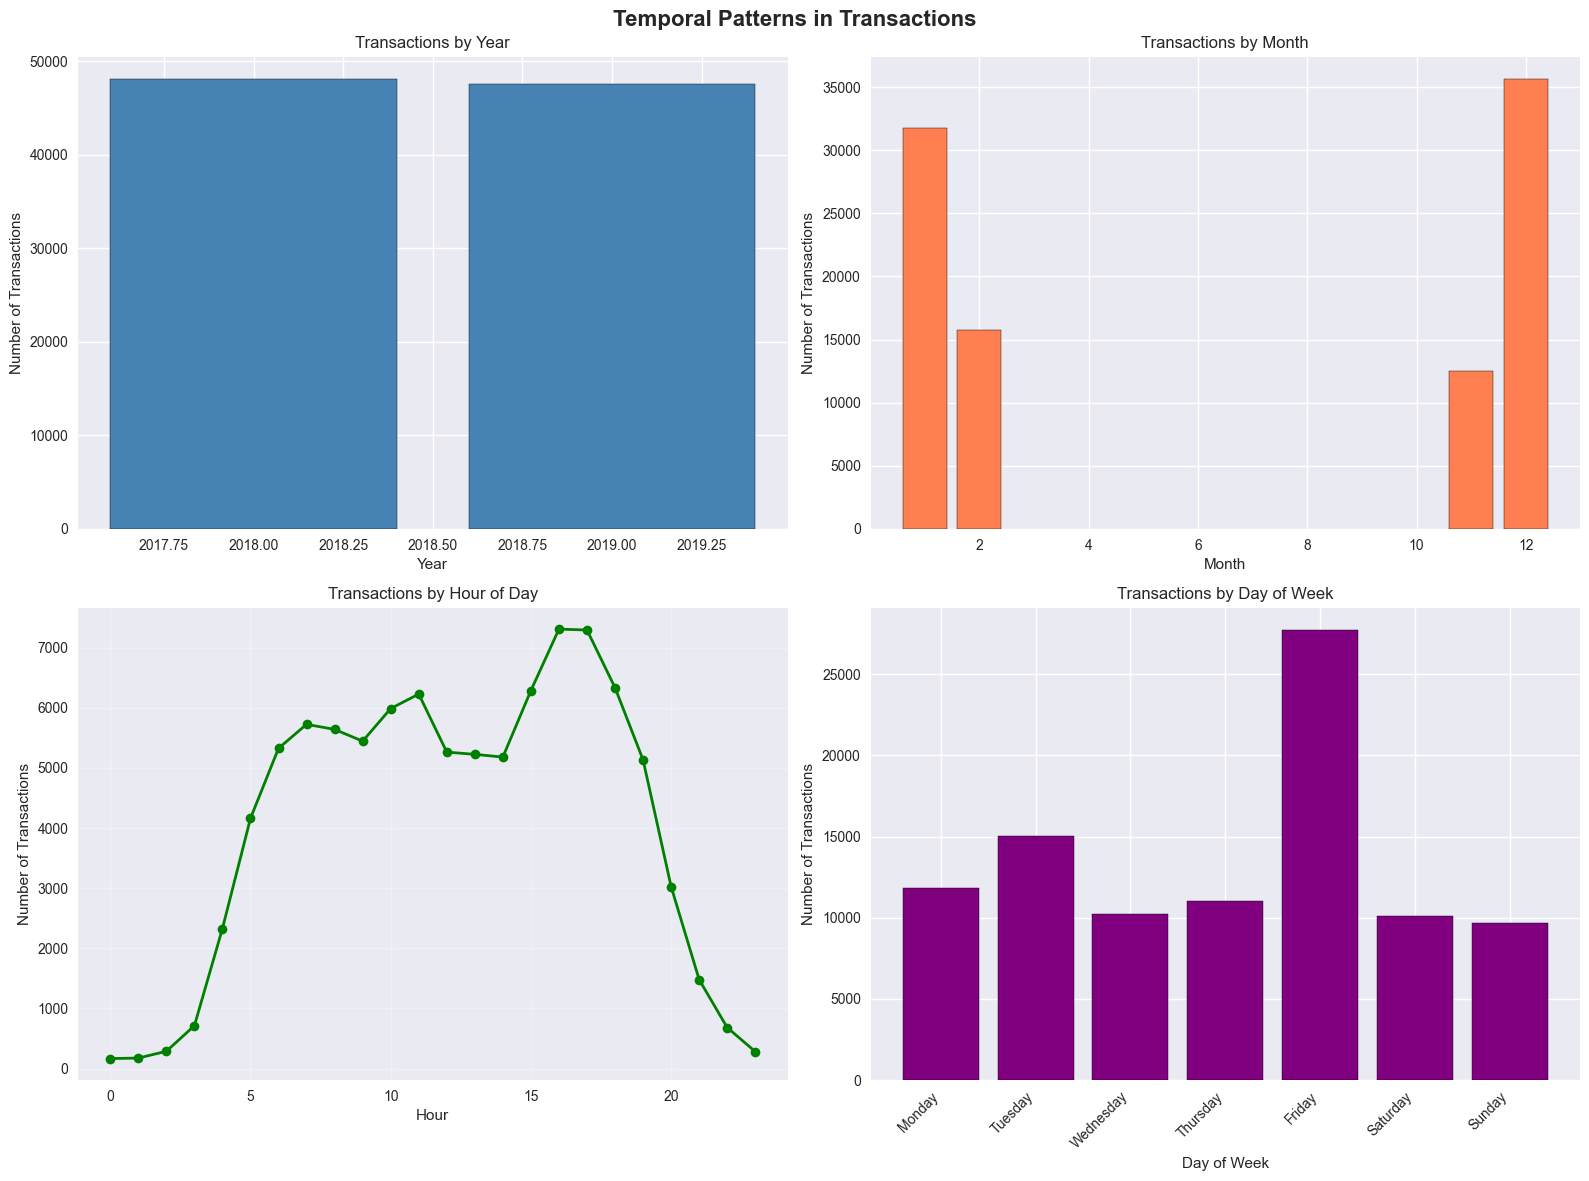

Figure saved to: figures/09_temporal_patterns.png


In [31]:
# Temporal analysis - Parse TransactionStartTime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['TransactionYear'] = df['TransactionStartTime'].dt.year
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDayOfWeek'] = df['TransactionStartTime'].dt.dayofweek

# Transaction trends over time
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Temporal Patterns in Transactions', fontsize=16, fontweight='bold')

# Transactions by year
year_counts = df['TransactionYear'].value_counts().sort_index()
axes[0, 0].bar(year_counts.index, year_counts.values, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Transactions by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Transactions')

# Transactions by month
month_counts = df['TransactionMonth'].value_counts().sort_index()
axes[0, 1].bar(month_counts.index, month_counts.values, color='coral', edgecolor='black')
axes[0, 1].set_title('Transactions by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Transactions')

# Transactions by hour
hour_counts = df['TransactionHour'].value_counts().sort_index()
axes[1, 0].plot(hour_counts.index, hour_counts.values, marker='o', color='green', linewidth=2)
axes[1, 0].set_title('Transactions by Hour of Day')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Number of Transactions')
axes[1, 0].grid(True, alpha=0.3)

# Transactions by day of week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['TransactionDayOfWeek'].value_counts().sort_index()
axes[1, 1].bar(range(len(day_counts)), day_counts.values, color='purple', edgecolor='black')
axes[1, 1].set_title('Transactions by Day of Week')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Number of Transactions')
axes[1, 1].set_xticks(range(len(day_counts)))
axes[1, 1].set_xticklabels([day_names[i] for i in day_counts.index], rotation=45, ha='right')

plt.tight_layout()
plt.savefig(f'{figures_dir}/09_temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Figure saved to: {figures_dir}/09_temporal_patterns.png")


In [24]:
# Customer-level aggregation for RFM analysis preview
print("=" * 60)
print("CUSTOMER-LEVEL AGGREGATION PREVIEW")
print("=" * 60)

customer_stats = df.groupby('CustomerId').agg({
    'Amount': ['count', 'sum', 'mean', 'std'],
    'Value': ['sum', 'mean'],
    'TransactionStartTime': ['min', 'max']
}).round(2)

customer_stats.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Std_Amount', 
                          'Total_Value', 'Avg_Value', 'First_Transaction', 'Last_Transaction']

print(f"\nNumber of unique customers: {df['CustomerId'].nunique():,}")
print(f"\nCustomer Statistics Summary:")
print(customer_stats.describe())


CUSTOMER-LEVEL AGGREGATION PREVIEW

Number of unique customers: 3,742

Customer Statistics Summary:
       Transaction_Count  Total_Amount    Avg_Amount    Std_Amount  \
count        3742.000000  3.742000e+03  3.742000e+03  3.030000e+03   
mean           25.564404  1.717377e+05  1.571562e+04  1.680216e+04   
std            96.929602  2.717305e+06  1.676991e+05  1.074311e+05   
min             1.000000 -1.049000e+08 -4.250000e+05  0.000000e+00   
25%             2.000000  4.077438e+03  1.000000e+03  1.533575e+03   
50%             7.000000  2.000000e+04  2.583845e+03  5.389780e+03   
75%            20.000000  7.996775e+04  4.877610e+03  7.549050e+03   
max          4091.000000  8.345124e+07  8.601821e+06  3.309916e+06   

        Total_Value     Avg_Value  
count  3.742000e+03  3.742000e+03  
mean   2.531025e+05  1.875612e+04  
std    2.715877e+06  1.674529e+05  
min    5.000000e+01  5.000000e+01  
25%    6.500000e+03  1.160653e+03  
50%    3.200000e+04  3.950000e+03  
75%    1.020600e+

## 8. Key Insights Summary

Based on the exploratory data analysis, here are the top 3-5 most important insights:


In [26]:
# Dynamic Key Insights Generation
print("=" * 80)
print("KEY INSIGHTS SUMMARY - AUTOMATED ANALYSIS")
print("=" * 80)

insights = []

# Insight 1: Data Quality Assessment
missing_count = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
missing_pct = (missing_count / total_cells) * 100

if missing_count == 0:
    insights.append({
        'title': 'Data Completeness: No Missing Values',
        'finding': f'The dataset contains {df.shape[0]:,} transactions with {df.shape[1]} features and has zero missing values. This indicates high data quality.',
        'implication': 'No imputation strategy needed. We can proceed directly with feature engineering without handling missing data.',
        'action': 'Proceed with feature engineering pipeline without missing value imputation steps.'
    })
else:
    missing_cols = df.columns[df.isnull().any()].tolist()
    insights.append({
        'title': f'Data Quality: Missing Values Detected ({missing_pct:.2f}%)',
        'finding': f'{missing_count:,} missing values found in {len(missing_cols)} columns: {", ".join(missing_cols[:5])}',
        'implication': 'Missing values need to be handled before modeling. The imputation strategy should be chosen based on the nature of each feature.',
        'action': f'Implement appropriate imputation strategy (mean/median/mode/KNN) for columns: {", ".join(missing_cols)}'
    })

# Insight 2: Dataset Scale and Customer Distribution
n_customers = df['CustomerId'].nunique()
n_transactions = len(df)
avg_trans_per_customer = n_transactions / n_customers
customer_stats = df.groupby('CustomerId').size()

insights.append({
    'title': f'Customer Base: {n_customers:,} Unique Customers',
    'finding': f'Dataset contains {n_transactions:,} transactions from {n_customers:,} unique customers. Average of {avg_trans_per_customer:.1f} transactions per customer. Transaction distribution: min={customer_stats.min()}, median={customer_stats.median():.0f}, max={customer_stats.max()}.',
    'implication': 'High variability in customer transaction frequency. Some customers are highly active while others have minimal activity. This is ideal for RFM-based segmentation.',
    'action': 'Use RFM analysis to segment customers. Consider log transformation for transaction count features to handle high variance.'
})

# Insight 3: Numerical Feature Skewness and Distribution
highly_skewed = []
for col in numerical_cols:
    skew_val = df[col].skew()
    if abs(skew_val) > 1:
        highly_skewed.append((col, skew_val))

if highly_skewed:
    skewed_cols = [f"{col} (skew={val:.2f})" for col, val in highly_skewed]
    insights.append({
        'title': f'Feature Skewness: {len(highly_skewed)} Highly Skewed Features',
        'finding': f'The following features show high skewness: {", ".join(skewed_cols)}. This indicates non-normal distributions with potential outliers.',
        'implication': 'Highly skewed features may require transformation (log, square root) before modeling. Outliers may need special handling.',
        'action': f'Apply log transformation to: {", ".join([col for col, _ in highly_skewed])}. Consider robust scaling methods.'
    })
else:
    insights.append({
        'title': 'Feature Distributions: Relatively Normal',
        'finding': 'No features show extreme skewness (|skew| > 1). Distributions are relatively symmetric.',
        'implication': 'Features may not require extensive transformation. Standard scaling should be sufficient.',
        'action': 'Proceed with standard scaling/normalization. Monitor model performance to determine if transformations are needed.'
    })

# Insight 4: Outlier Analysis
outlier_summary = []
for col in ['Amount', 'Value']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_pct = (len(outliers) / len(df)) * 100
        outlier_summary.append(f"{col}: {outlier_pct:.1f}% outliers")

if outlier_summary:
    insights.append({
        'title': 'Outlier Detection: Significant Outliers Present',
        'finding': f'Outlier analysis reveals: {"; ".join(outlier_summary)}. These outliers may represent legitimate high-value transactions or data quality issues.',
        'implication': 'Outliers can significantly impact model performance. Need to decide whether to cap, transform, or keep outliers based on business context.',
        'action': 'Investigate outlier transactions. Consider capping at 99th percentile or using robust scaling methods that are less sensitive to outliers.'
    })

# Insight 5: Categorical Feature Distribution
product_cat_dist = df['ProductCategory'].value_counts()
dominant_category = product_cat_dist.index[0]
dominant_pct = (product_cat_dist.iloc[0] / len(df)) * 100

if dominant_pct > 50:
    insights.append({
        'title': f'Product Category: Highly Imbalanced Distribution',
        'finding': f'Product category "{dominant_category}" dominates with {dominant_pct:.1f}% of transactions. Top 3 categories: {", ".join([f"{cat} ({pct:.1f}%)" for cat, pct in zip(product_cat_dist.index[:3], (product_cat_dist[:3] / len(df) * 100).values)])}',
        'implication': 'High class imbalance in product categories. One-hot encoding may create sparse features. Consider target encoding or frequency encoding.',
        'action': 'Use frequency encoding or target encoding for ProductCategory instead of one-hot encoding to reduce dimensionality.'
    })
else:
    insights.append({
        'title': 'Product Category: Relatively Balanced Distribution',
        'finding': f'Product categories show relatively balanced distribution. Top category "{dominant_category}" has {dominant_pct:.1f}% share.',
        'implication': 'One-hot encoding or label encoding can be used effectively. No special handling needed for class imbalance.',
        'action': 'Proceed with standard categorical encoding (one-hot or label encoding) for ProductCategory.'
    })

# Insight 6: Correlation Analysis
if 'Amount' in df.columns and 'Value' in df.columns:
    amount_value_corr = df['Amount'].corr(df['Value'])
    if abs(amount_value_corr) > 0.9:
        insights.append({
            'title': 'Feature Correlation: High Correlation Between Amount and Value',
            'finding': f'Amount and Value show very high correlation ({amount_value_corr:.3f}). This is expected as Value is the absolute value of Amount.',
            'implication': 'These features contain redundant information. Including both may cause multicollinearity issues in linear models.',
            'action': 'Use only one of these features (preferably Value) or create a derived feature. Consider removing Amount if Value is used.'
        })

# Insight 7: Fraud Result Distribution (if available)
if 'FraudResult' in df.columns:
    fraud_dist = df['FraudResult'].value_counts()
    fraud_rate = (fraud_dist.get(1, 0) / len(df)) * 100
    if fraud_rate < 5:
        insights.append({
            'title': f'Fraud Detection: Low Fraud Rate ({fraud_rate:.2f}%)',
            'finding': f'Only {fraud_rate:.2f}% of transactions are flagged as fraud. This indicates a highly imbalanced target if used as proxy.',
            'implication': 'If FraudResult is used as proxy target, class imbalance techniques (SMOTE, class weights) will be needed.',
            'action': 'Consider FraudResult as potential proxy component, but combine with other indicators. Use class weights or resampling techniques if used as target.'
        })
    elif fraud_rate > 20:
        insights.append({
            'title': f'Fraud Detection: High Fraud Rate ({fraud_rate:.2f}%)',
            'finding': f'{fraud_rate:.2f}% of transactions are flagged as fraud. This is unusually high and may indicate data quality issues or different fraud definition.',
            'implication': 'High fraud rate may not be suitable as direct proxy. Need to investigate fraud definition and data quality.',
            'action': 'Investigate fraud definition. Consider using fraud patterns (not just binary) as features rather than direct proxy.'
        })

# Insight 8: Temporal Patterns
if 'TransactionStartTime' in df.columns:
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    df['TransactionYear'] = df['TransactionStartTime'].dt.year
    year_counts = df['TransactionYear'].value_counts()
    
    if len(year_counts) > 1:
        year_span = year_counts.index.max() - year_counts.index.min()
        insights.append({
            'title': f'Temporal Coverage: {year_span} Year(s) of Transaction History',
            'finding': f'Data spans from {year_counts.index.min()} to {year_counts.index.max()}. Year distribution: {dict(year_counts)}',
            'implication': 'Sufficient temporal data for RFM analysis. Can calculate recency based on latest transaction date. Temporal features (month, day, hour) can capture seasonality.',
            'action': 'Use latest transaction date as snapshot date for Recency calculation. Extract temporal features (year, month, day, hour, day_of_week) for modeling.'
        })

# Display top 5 insights
print(f"\n{'='*80}")
print(f"TOP {min(5, len(insights))} KEY INSIGHTS")
print(f"{'='*80}\n")

for i, insight in enumerate(insights[:5], 1):
    print(f"### Insight {i}: {insight['title']}")
    print(f"**Finding**: {insight['finding']}")
    print(f"**Implication**: {insight['implication']}")
    print(f"**Action**: {insight['action']}")
    if i < min(5, len(insights)):
        print("\n---\n")

print(f"\n{'='*80}")
print(f"Total insights generated: {len(insights)}")
print(f"{'='*80}")


KEY INSIGHTS SUMMARY - AUTOMATED ANALYSIS

TOP 5 KEY INSIGHTS

### Insight 1: Data Completeness: No Missing Values
**Finding**: The dataset contains 95,662 transactions with 21 features and has zero missing values. This indicates high data quality.
**Implication**: No imputation strategy needed. We can proceed directly with feature engineering without handling missing data.
**Action**: Proceed with feature engineering pipeline without missing value imputation steps.

---

### Insight 2: Customer Base: 3,742 Unique Customers
**Finding**: Dataset contains 95,662 transactions from 3,742 unique customers. Average of 25.6 transactions per customer. Transaction distribution: min=1, median=7, max=4091.
**Implication**: High variability in customer transaction frequency. Some customers are highly active while others have minimal activity. This is ideal for RFM-based segmentation.
**Action**: Use RFM analysis to segment customers. Consider log transformation for transaction count features to ha